In [40]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

In [2]:
cloud_config= {'secure_connect_bundle': r'C:\Users\biswa\OneDrive\pred_main\cassandra\secure-connect-jet-engine-rul.zip'}
auth_provider = PlainTextAuthProvider(CASSANDRA_ID, CASSANDRA_KEY)
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)

In [3]:
session = cluster.connect('machine_learning')
session.execute("USE machine_learning;")

In [4]:
col = ["engine", "cycles", "os1", "os2", "os3", "sm1", "sm2", "sm3", "sm4", "sm5", "sm6", "sm7", "sm8", "sm9",
       "sm10", "sm11", "sm12", "sm13", "sm14", "sm15", "sm16", "sm17", "sm18", "sm19", "sm20", "sm21" ]

train2 = pd.DataFrame(session.execute("SELECT * FROM train2fd;")).set_index("slno").sort_index()
train2 = train2.reindex(columns = col)

In [5]:
test2 = pd.DataFrame(session.execute("SELECT * FROM test2fd;")).set_index("slno").sort_index()
test2 = test2.reindex(columns = col)

In [6]:
rul2 = pd.DataFrame(session.execute("SELECT * FROM rul2fd;")).set_index("slno").sort_index()

In [7]:
print(train2.shape)
print(test2.shape)
print(rul2.shape)

(53759, 26)
(33991, 26)
(259, 1)


In [8]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53759 entries, 0 to 53758
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   engine  53759 non-null  int64  
 1   cycles  53759 non-null  int64  
 2   os1     53759 non-null  float64
 3   os2     53759 non-null  float64
 4   os3     53759 non-null  int64  
 5   sm1     53759 non-null  float64
 6   sm2     53759 non-null  float64
 7   sm3     53759 non-null  float64
 8   sm4     53759 non-null  float64
 9   sm5     53759 non-null  float64
 10  sm6     53759 non-null  float64
 11  sm7     53759 non-null  float64
 12  sm8     53759 non-null  float64
 13  sm9     53759 non-null  float64
 14  sm10    53759 non-null  float64
 15  sm11    53759 non-null  float64
 16  sm12    53759 non-null  float64
 17  sm13    53759 non-null  float64
 18  sm14    53759 non-null  float64
 19  sm15    53759 non-null  float64
 20  sm16    53759 non-null  float64
 21  sm17    53759 non-null  int64  
 22

In [9]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 33991 entries, 0.0 to 33990.0
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   engine  33991 non-null  float64
 1   cycles  33991 non-null  float64
 2   os1     33991 non-null  float64
 3   os2     33991 non-null  float64
 4   os3     33991 non-null  float64
 5   sm1     33991 non-null  float64
 6   sm2     33991 non-null  float64
 7   sm3     33991 non-null  float64
 8   sm4     33991 non-null  float64
 9   sm5     33991 non-null  float64
 10  sm6     33991 non-null  float64
 11  sm7     33991 non-null  float64
 12  sm8     33991 non-null  float64
 13  sm9     33991 non-null  float64
 14  sm10    33991 non-null  float64
 15  sm11    33991 non-null  float64
 16  sm12    33991 non-null  float64
 17  sm13    33991 non-null  float64
 18  sm14    33991 non-null  float64
 19  sm15    33991 non-null  float64
 20  sm16    33991 non-null  float64
 21  sm17    33991 non-null  float

In [10]:
rul2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 0 to 258
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   rul     259 non-null    int64
dtypes: int64(1)
memory usage: 4.0 KB


In [11]:
train2.describe().T

,count,mean,std,min,25%,50%,75%,max
engine,53759.0,131.082981,74.463862,1.000000,68.000000,131.000000,195.000000,260.000000
cycles,53759.0,109.154746,69.180569,1.000000,52.000000,104.000000,157.000000,378.000000
os1,53759.0,23.998407,14.747376,0.000000,10.004600,25.001301,41.998001,42.007999
os2,53759.0,0.572056,0.310016,0.000000,0.250700,0.700000,0.840000,0.842000
os3,53759.0,94.046020,14.237735,60.000000,100.000000,100.000000,100.000000,100.000000
sm1,53759.0,472.910205,26.389701,445.000000,445.000000,462.540009,491.190002,518.669983
sm2,53759.0,579.672399,37.289399,535.530029,549.570007,555.979980,607.340027,644.520020
sm3,53759.0,1419.971013,105.946340,1243.729980,1352.760010,1369.180054,1499.369995,1612.880005
sm4,53759.0,1205.442024,119.123428,1023.770020,1123.655029,1138.890015,1306.849976,1439.229980
sm5,53759.0,8.031986,3.613839,3.910000,3.910000,7.050000,10.520000,14.620000


In [12]:
test2.describe().T

,count,mean,std,min,25%,50%,75%,max
engine,33991.0,127.528346,74.144727,1.000000,65.000000,128.000000,189.000000,259.000000
cycles,33991.0,81.223647,58.892845,1.000000,34.000000,70.000000,119.000000,367.000000
os1,33991.0,23.975176,14.778959,0.000000,10.004600,25.001301,35.007999,42.007999
os2,33991.0,0.571154,0.310998,0.000000,0.250600,0.700000,0.840000,0.842000
os3,33991.0,94.066665,14.217415,60.000000,100.000000,100.000000,100.000000,100.000000
sm1,33991.0,472.930046,26.454679,445.000000,449.440002,462.540009,491.190002,518.669983
sm2,33991.0,579.591704,37.338930,535.409973,549.479980,555.830017,607.260010,644.320007
sm3,33991.0,1418.562089,105.979170,1245.160034,1351.640015,1367.369995,1498.300049,1609.689941
sm4,33991.0,1203.086538,119.039415,1030.089966,1122.520020,1134.160034,1305.454956,1434.119995
sm5,33991.0,8.039014,3.623831,3.910000,5.480000,7.050000,10.520000,14.620000


In [13]:
rul2.describe().T

,count,mean,std,min,25%,50%,75%,max
rul,259.0,81.185328,53.882916,6.0,35.0,80.0,121.0,194.0


In [14]:
train2

,engine,cycles,os1,os2,os3,sm1,sm2,sm3,sm4,sm5,...,sm12,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21
slno,,,,,,,,,,,,,,,,,,,,,
0,1,1,34.998299,0.8400,100,449.440002,555.320007,1358.609985,1137.229980,5.48,...,183.059998,2387.719971,8048.560059,9.3461,0.02,334,2223,100.00,14.730000,8.8071
1,1,2,41.998199,0.8408,100,445.000000,549.900024,1353.219971,1125.780029,3.91,...,130.419998,2387.659912,8072.299805,9.3774,0.02,330,2212,100.00,10.410000,6.2665
2,1,3,24.998800,0.6218,60,462.540009,537.309998,1256.760010,1047.449951,7.05,...,164.220001,2028.030029,7864.870117,10.8941,0.02,309,1915,84.93,14.080000,8.6723
3,1,4,42.007702,0.8416,100,445.000000,549.510010,1354.030029,1126.380005,3.91,...,130.720001,2387.610107,8068.660156,9.3528,0.02,329,2212,100.00,10.590000,6.4701
4,1,5,25.000500,0.6203,60,462.540009,537.070007,1257.709961,1047.930054,7.05,...,164.309998,2028.000000,7861.229980,10.8963,0.02,309,1915,84.93,14.130000,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.003700,0.7000,100,491.190002,608.789978,1495.599976,1269.510010,9.35,...,314.049988,2389.020020,8169.640137,9.3035,0.03,369,2324,100.00,24.360001,14.5189
53755,260,313,10.002200,0.2510,100,489.049988,605.809998,1514.319946,1324.119995,10.52,...,371.220001,2388.419922,8245.360352,8.7586,0.03,374,2319,100.00,28.100000,16.9454
53756,260,314,25.004101,0.6200,60,462.540009,537.479980,1276.239990,1057.920044,7.05,...,163.740005,2030.329956,7971.250000,11.0657,0.02,310,1915,84.93,14.190000,8.5503


In [15]:
test2

,engine,cycles,os1,os2,os3,sm1,sm2,sm3,sm4,sm5,...,sm12,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21
slno,,,,,,,,,,,,,,,,,,,,,
0.0,1.0,1.0,9.998700,0.2502,100.0,489.049988,605.030029,1497.170044,1304.989990,10.52,...,371.690002,2388.179932,8114.100098,8.6476,0.03,369.0,2319.0,100.00,28.420000,17.1551
1.0,1.0,2.0,20.002600,0.7000,100.0,491.190002,607.820007,1481.199951,1246.109985,9.35,...,315.320007,2388.120117,8053.060059,9.2405,0.02,364.0,2324.0,100.00,24.290001,14.8039
2.0,1.0,3.0,35.004501,0.8400,100.0,449.440002,556.000000,1359.079956,1128.359985,5.48,...,183.039993,2387.750000,8053.040039,9.3472,0.02,333.0,2223.0,100.00,14.980000,8.9125
3.0,1.0,4.0,42.006599,0.8410,100.0,445.000000,550.169983,1349.689941,1127.890015,3.91,...,130.399994,2387.719971,8066.899902,9.3961,0.02,332.0,2212.0,100.00,10.350000,6.4181
4.0,1.0,5.0,24.998501,0.6213,60.0,462.540009,536.719971,1253.180054,1050.689941,7.05,...,164.559998,2028.050049,7865.660156,10.8682,0.02,305.0,1915.0,84.93,14.310000,8.5740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986.0,259.0,119.0,35.001499,0.8403,100.0,449.440002,555.559998,1366.010010,1129.469971,5.48,...,183.050003,2388.389893,8088.359863,9.3215,0.02,334.0,2223.0,100.00,14.940000,8.9065
33987.0,259.0,120.0,42.006599,0.8405,100.0,445.000000,549.419983,1351.130005,1123.859985,3.91,...,130.740005,2388.310059,8108.479980,9.3542,0.02,332.0,2212.0,100.00,10.570000,6.4075
33988.0,259.0,121.0,42.006100,0.8400,100.0,445.000000,549.650024,1349.140015,1118.910034,3.91,...,130.960007,2388.340088,8098.770020,9.3836,0.02,331.0,2212.0,100.00,10.570000,6.4805


In [16]:
rul2

,rul
slno,
0,18
1,79
2,106
3,110
4,15
...,...
254,122
255,191
256,56


In [17]:
drop_col = ["os1", "os2", "os3", "sm16"]
train2.drop(columns = drop_col, inplace = True)
test2.drop(columns = drop_col, inplace = True)

In [18]:
rul2.insert(0, 'engine', range(1,260))

In [19]:
n_engine = train2['engine'].unique()
print(n_engine)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [20]:
last_cycle_train_engine = train2.groupby(['engine'])['cycles'].count().values
print(last_cycle_train_engine)

[149 269 206 235 154 175 174 151 199 184 271 249 227 193 209 154 180 209
 163 154 189 192 211 191 205 187 176 200 151 166 343 281 195 205 196 203
 210 177 214 193 262 221 211 205 151 201 246 239 168 222 293 174 148 199
 159 163 140 162 194 177 218 184 168 282 206 170 145 185 136 156 194 196
 239 158 231 244 185 161 181 221 288 200 170 259 347 190 170 365 188 188
 245 188 189 306 198 208 145 167 202 212 211 164 280 228 303 272 145 156
 220 221 200 378 232 203 206 207 177 344 174 129 210 185 226 267 168 199
 256 303 202 182 280 183 159 247 294 160 148 200 194 214 163 208 166 224
 251 263 207 279 289 222 177 184 292 193 226 299 237 308 241 212 224 194
 203 249 165 204 232 217 185 179 258 174 151 193 202 164 181 148 181 297
 255 200 207 171 162 194 168 148 209 257 219 133 172 148 190 239 154 205
 219 227 191 197 269 237 198 221 184 150 201 184 214 149 196 146 226 229
 162 237 156 234 178 195 218 174 156 178 184 262 176 186 144 242 190 159
 183 239 209 156 263 266 183 273 230 128 253 194 19

In [21]:
last_cycle_test_engine = test2.groupby(['engine'])['cycles'].count().values
print(last_cycle_test_engine)

[258  55 165  86 148  63 184 173 161  84 162  74 164 160 165  88 264  40
 172 101 128 159  49 210 147  76  68  23 101 184 123 170 135  52  77 163
  49 127 149 183 210 137 184 164 195 132  81 132  65 164  37 165 149  74
 123  73  76 247  22 144  70 205 174 233 367  63 146 218 158 264  65 143
 151 103 192 222  67 128 113 278  76  96  21 204 183  83 131 166  59 163
 278 123  76 117  78 140 213 113 163 149  38 122 186 141  61  72 132 174
 144 219 131 109  45 153 210 171  55  97 202 160  59  29  61 149  79  99
 126 110 218 141  73 122 186 186 120  77 226 200 116 306  69 163 226 143
 142 144  78 157  70 196 141  90 146  58  72  75 161 171 187 124 174 185
 144 199  35  97  78 107  80  85 243 128 117  51  83 200 191  54 156 154
 199 134 150  64 254 166  84  86 178 158  95 161 245  50 262 109  59 120
 117  60  25 124 115  41  31 162 141 166 131 182 155 187 159  75  71 100
  49  33 161  54  55 180  29  43 166 165 180  44 109 125 187 159  40 147
 102 274 235  94 106  50  44 194  40  49 265  80  8

In [22]:
print(list(rul2['rul']))

[18, 79, 106, 110, 15, 155, 6, 90, 11, 79, 6, 73, 30, 11, 37, 67, 68, 99, 22, 54, 97, 10, 142, 77, 88, 163, 126, 138, 83, 78, 75, 11, 53, 173, 63, 100, 151, 55, 48, 37, 44, 27, 18, 6, 15, 112, 131, 13, 122, 13, 98, 53, 52, 106, 103, 152, 123, 26, 178, 73, 169, 39, 39, 14, 11, 121, 86, 56, 115, 17, 148, 104, 78, 86, 98, 36, 94, 52, 91, 15, 141, 74, 146, 17, 47, 194, 21, 79, 97, 8, 9, 73, 183, 97, 73, 49, 31, 97, 9, 14, 106, 8, 8, 106, 116, 120, 61, 168, 35, 80, 9, 50, 151, 78, 91, 7, 181, 150, 106, 15, 67, 145, 180, 7, 179, 124, 82, 108, 79, 121, 120, 39, 38, 9, 167, 87, 88, 7, 51, 55, 155, 47, 81, 43, 98, 10, 92, 11, 165, 34, 115, 59, 99, 103, 108, 83, 171, 15, 9, 42, 13, 41, 88, 14, 155, 188, 96, 82, 135, 182, 36, 107, 14, 95, 142, 23, 6, 144, 35, 97, 68, 14, 67, 191, 19, 10, 158, 183, 43, 12, 148, 13, 37, 122, 80, 93, 132, 32, 103, 174, 111, 68, 192, 121, 134, 48, 85, 8, 23, 8, 6, 57, 83, 172, 101, 81, 86, 165, 73, 121, 139, 75, 151, 145, 11, 108, 14, 126, 61, 85, 8, 101, 153, 89, 19

In [23]:
rul_cycle = list(rul2['rul'])
max_cycle = pd.DataFrame(rul_cycle) + pd.DataFrame(test2.groupby(['engine'])['cycles'].count().values)
max_cycle.insert(0, 'engine', range(1, 1 + len(max_cycle[0])))
max_cycle.rename(columns = {0:'max_cycle'} , inplace = True)
max_cycle

,engine,max_cycle
0,1,276
1,2,134
2,3,271
3,4,196
4,5,163
...,...,...
254,255,272
255,256,250
256,257,255
257,258,229


In [24]:
test2 = test2.merge(max_cycle, on = ['engine'], how = 'left')
test2['rul'] = test2['max_cycle'] - test2['cycles']

In [25]:
def remain_rul(max_cycle):
    rul = np.arange(max_cycle-1, -1, -1)
    return rul

In [26]:
all_cycle = []
for max_cycle in last_cycle_train_engine:
    all_cycle = all_cycle + list(remain_rul(max_cycle))

all_cycle = pd.DataFrame(all_cycle, columns = ['rul'])

In [27]:
train2 = pd.concat([train2, all_cycle], axis = 1)

<AxesSubplot: >

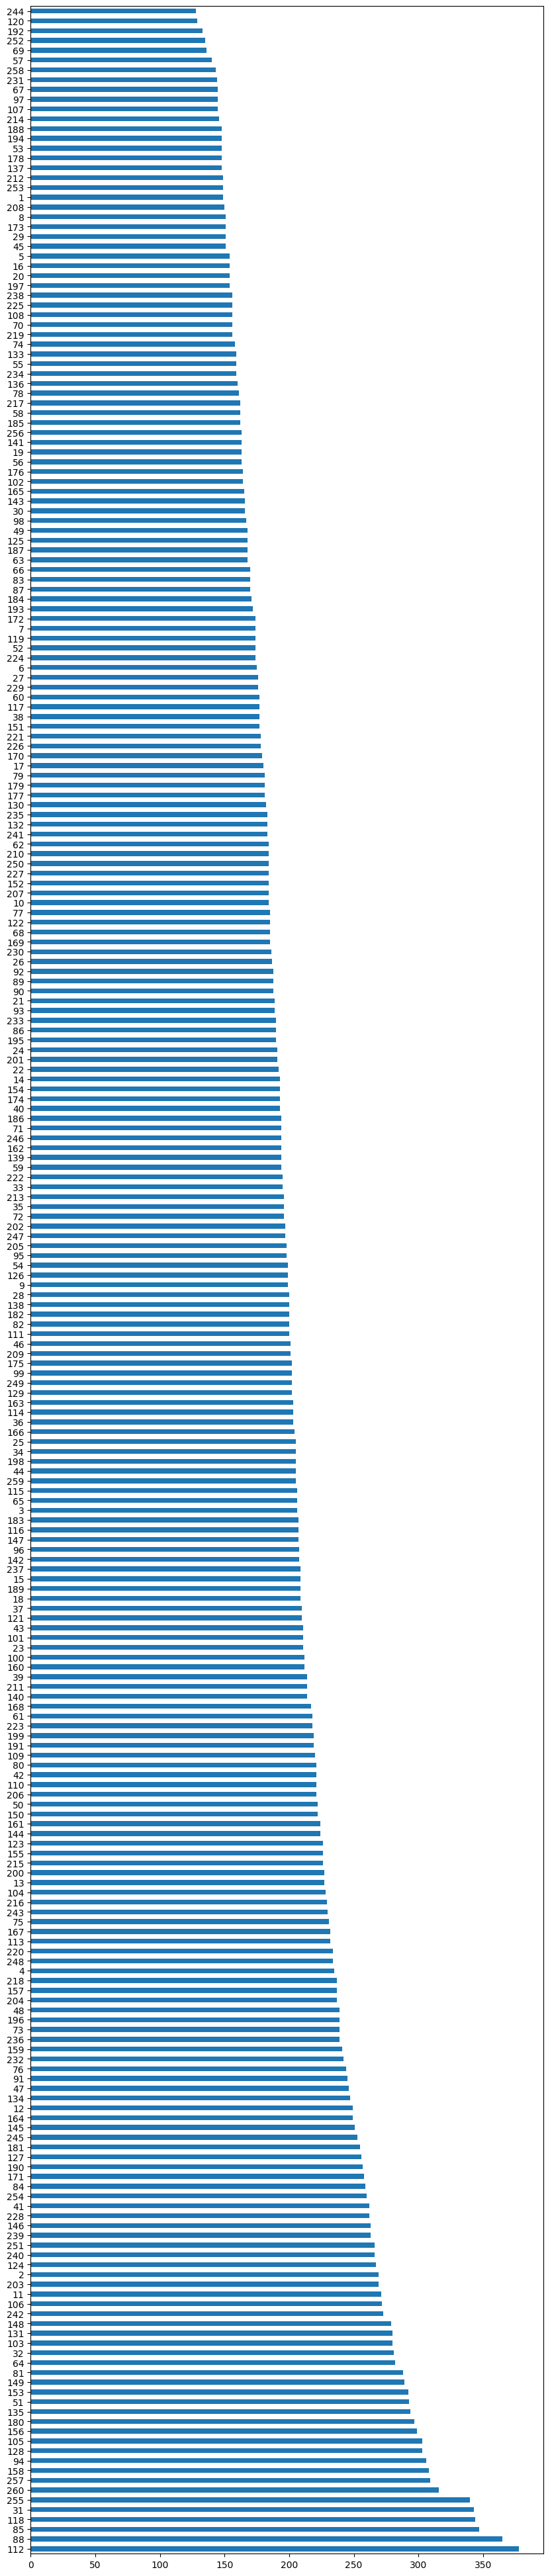

In [28]:
train2['engine'].value_counts().plot(kind='barh', figsize=(10,50))

<AxesSubplot: >

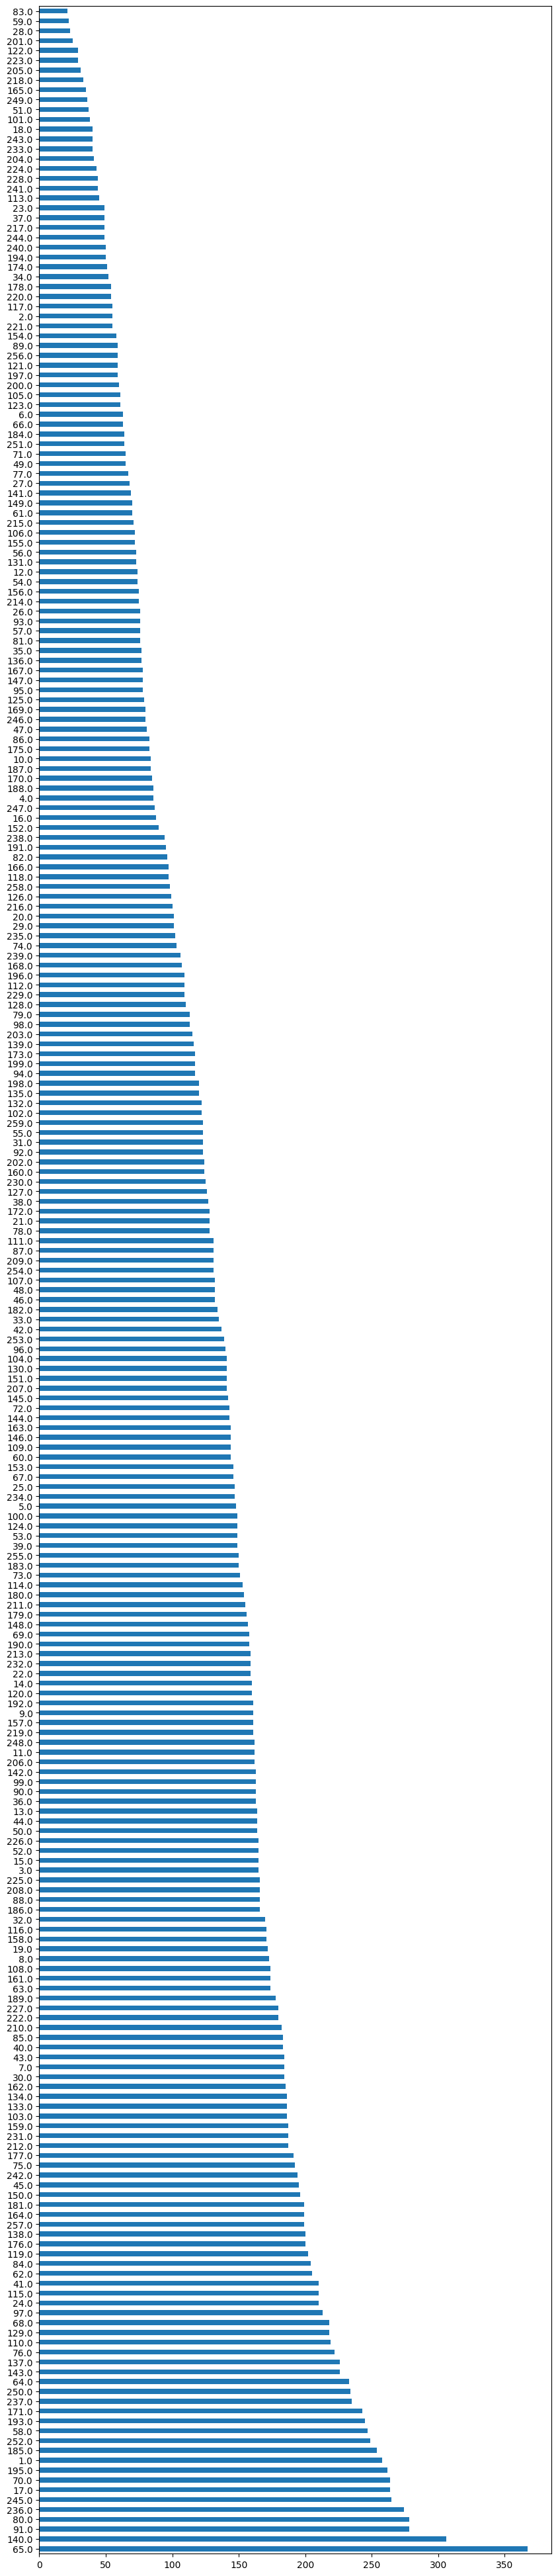

In [29]:
test2['engine'].value_counts().plot(kind = 'barh', figsize = (10,50))

In [30]:
num_engines = list(test2['engine'].unique())
print(num_engines)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 1

In [31]:
data = []
for i in np.arange(1, len(num_engines) + 1):
    temp_test_data = test2[test2['engine'] == i].drop(columns = ['max_cycle']).values
    data.append(temp_test_data[-1])

coln = list(test2.columns.drop('max_cycle'))
test2_pre = pd.DataFrame(data, columns = coln)

In [32]:
train2.columns

Index(['engine', 'cycles', 'sm1', 'sm2', 'sm3', 'sm4', 'sm5', 'sm6', 'sm7',
       'sm8', 'sm9', 'sm10', 'sm11', 'sm12', 'sm13', 'sm14', 'sm15', 'sm17',
       'sm18', 'sm19', 'sm20', 'sm21', 'rul'],
      dtype='object')

In [33]:
test2_pre.columns

Index(['engine', 'cycles', 'sm1', 'sm2', 'sm3', 'sm4', 'sm5', 'sm6', 'sm7',
       'sm8', 'sm9', 'sm10', 'sm11', 'sm12', 'sm13', 'sm14', 'sm15', 'sm17',
       'sm18', 'sm19', 'sm20', 'sm21', 'rul'],
      dtype='object')

In [34]:
rul2.columns

Index(['engine', 'rul'], dtype='object')

In [35]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(train2.drop(columns = ['engine','cycles','rul']))
y_train = train2['rul']
x_test = scaler.transform(test2_pre.drop(columns = ['engine','cycles','rul']))
y_test = rul2['rul']

In [36]:
rf_model = RandomForestRegressor(n_estimators= 400, max_features = "log2",
                                 n_jobs = -1, random_state = 38)
rf_model.fit(x_train, y_train)
predictions = rf_model.predict(x_test)

In [37]:
print('Train Accuracy:', np.floor(100*(rf_model.score(x_train, y_train))))

r2 = np.floor(100 *(r2_score(y_test, predictions)))
print('Coefficient of determination:', r2)

mse =  mean_squared_error(y_test, predictions)
RMSE = np.ceil(np.sqrt(mse))

print("RMSE: ", RMSE)

Train Accuracy: 94.0
Coefficient of determination: 66.0
RMSE:  32.0


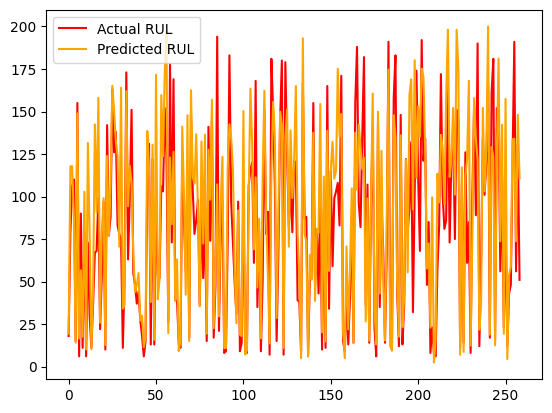

In [38]:
plt.plot(y_test, label = "Actual RUL", color = "red")
plt.plot(predictions, label = "Predicted RUL", color = "orange")
plt.legend()
plt.show()

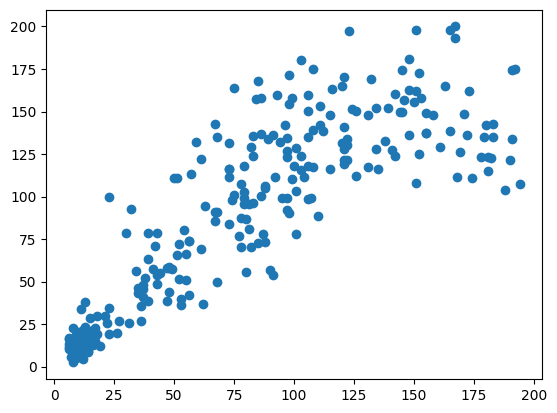

In [39]:
plt.scatter(y_test,predictions)
plt.show()

In [41]:
filename = "fd2.pkl"
pickle.dump(rf_model, open(filename,"wb"))